In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from make_df import make_df_from_spreadsheet
from rectangle_model import *

In [6]:
filename = 'teaching_stimuli - all_examples.csv'
all_problems = make_df_from_spreadsheet(filename)

In [16]:
problem = {}
problem[0] = find_teacher_probs(0, 43, all_problems)  # 0 iterations
problem[500] = find_teacher_probs(500, 43, all_problems)

In [17]:
def entropy_plot(problem, exs, problem_index):
    
    # Probabilities over h_1
    p_h1_0 = [problem[0][1]['h'].loc[exs[0], 'h_1'], 
            problem[0][2]['h'].loc[exs[1], 'h_1'], 
            problem[0][3]['h'].loc[exs[2], 'h_1']]

    p_h1_500 = [problem[500][1]['h'].loc[exs[0], 'h_1'], 
            problem[500][2]['h'].loc[exs[1], 'h_1'], 
            problem[500][3]['h'].loc[exs[2], 'h_1']]

    n_ex = range(1,4)
    
    # Probabilities over all hypotheses
    p_h_0 = [problem[0][1]['h'].loc[exs[0]], 
        problem[0][2]['h'].loc[exs[1]], 
        problem[0][3]['h'].loc[exs[2]]]

    p_h_500 = [problem[500][1]['h'].loc[exs[0]], 
            problem[500][2]['h'].loc[exs[1]], 
            problem[500][3]['h'].loc[exs[2]]]
    
    # Calculate entropy
    s_0 = [entropy(p_h_0[i].to_numpy()) for i in range(len(p_h_0))]
    s_500 = [entropy(p_h_500[i].to_numpy()) for i in range(len(p_h_500))]
    
    # Calculate correlation
    r = np.corrcoef(p_h1_0, p_h1_500)
    # print(r)
    
    plt.figure(figsize=(8,6))
    
    plt.plot(n_ex, p_h1_0, 'b--', label='Literal')
    plt.plot(n_ex, p_h1_500, 'b', label='Pragmatic')

    plt.title(f'Problem {problem_index}, learner\'s belief in $h_1$, $r={r[0, 1]:.3}$')
    plt.xlabel('Examples')
    plt.ylabel('$P(h_1|d)$')
    plt.xticks(n_ex, exs)
    plt.ylim((-0.05, 1.05))
    plt.tick_params(axis='y', labelcolor='b')
    plt.legend(loc='lower left', title='$P(h_1|d)$')
    
    plt.twinx()
    
    plt.plot(n_ex, s_0, 'g--', label='Literal')
    plt.plot(n_ex, s_500, 'g', label='Pragmatic')
    plt.ylabel('Entropy')
    plt.tick_params(axis='y', labelcolor='g')
    plt.legend(loc='upper left', title='Entropy')
    
    #plt.tight_layout()
    plt.show()

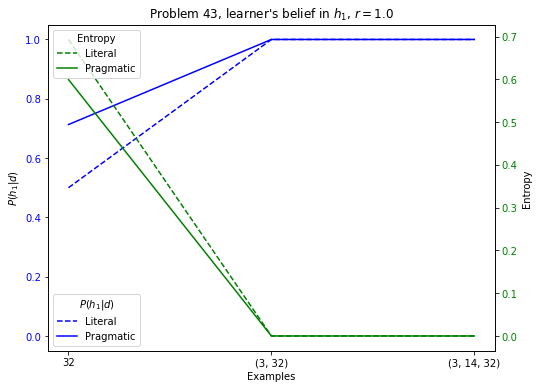

In [18]:
entropy_plot(problem, [32, (3, 32), (3, 14, 32)], 43)

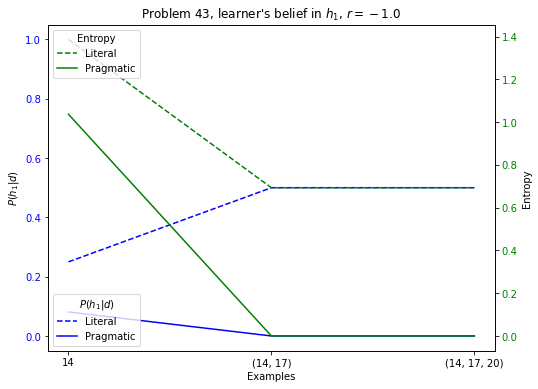

In [20]:
entropy_plot(problem, [14, (14, 17), (14, 17, 20)], 43)